In [50]:
import pandas as pd
import seaborn as sbn

from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [51]:
data = pd.read_excel('C:/Users/MAURICIO/Desktop/insurance_data.xlsx',header=0)

In [52]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


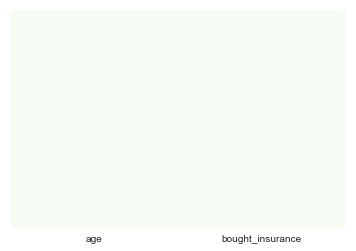

In [53]:
sbn.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="Greens")

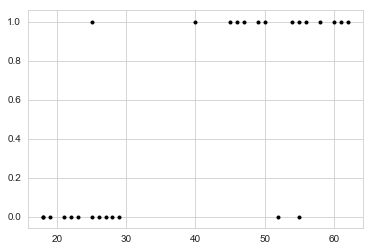

In [54]:
plt.scatter(data.age,data.bought_insurance,marker='.',color='black')

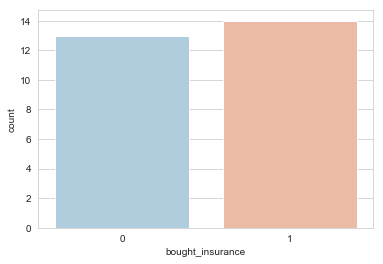

In [55]:
sbn.set_style('whitegrid')
sbn.countplot(x='bought_insurance',data=data,palette='RdBu_r')

In [56]:
x = data['age'] 
y = data['bought_insurance']     
print(len(x))

27


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

C:\Users\MAURICIO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [58]:
logistic_regression = LogisticRegression()

In [59]:
print(x_train.shape)
print(y_train.shape)

print(type(x_train))
print(type(y_train))

(18,)
(18,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [60]:
x_train = x_train.to_frame()
y_train = y_train.to_frame()

x_test = x_test.to_frame()
y_test = y_test.to_frame()

In [61]:
logistic_regression.fit(x_train,y_train)

C:\Users\MAURICIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MAURICIO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
logistic_regression.score(x_train,y_train)

0.8333333333333334

In [63]:
y_predicted = logistic_regression.predict(x_test)

In [64]:
y_predicted

array([1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [65]:
logistic_regression.score(x_test,y_test)

0.6666666666666666

In [66]:
confusion_matrix(y_test,y_predicted)

array([[2, 3],
       [0, 4]], dtype=int64)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.6666666666666666
Precision: 0.5714285714285714
Recall: 1.0
